In [1]:
ls C:\Users\vPro\Desktop\data_sets\ml-25m

 Volume in drive C has no label.
 Volume Serial Number is 8260-B43C

 Directory of C:\Users\vPro\Desktop\data_sets\ml-25m

01/14/2023  01:41 AM    <DIR>          .
01/14/2023  01:41 AM    <DIR>          ..
01/14/2023  01:41 AM               124 1.sql
11/21/2019  11:35 PM       435,164,157 genome-scores.csv
11/21/2019  11:35 PM            18,103 genome-tags.csv
11/21/2019  11:40 PM         1,368,578 links.csv
11/21/2019  11:32 PM         3,038,099 movies.csv
11/21/2019  11:26 PM       678,260,987 ratings.csv
11/21/2019  11:41 PM            10,460 README.txt
12/31/2022  03:30 PM        37,174,022 tags.csv
               8 File(s)  1,155,034,530 bytes
               2 Dir(s)  42,585,714,688 bytes free


In [31]:
import pandas as pd
path = "C:/Users/vPro/Desktop/data_sets/ml-25m/"
column_movies = ['movieId', 'title', 'genre']
column_ratings = ['user_id', 'movieId', 'rating', 'timestamp']
column_links = ['movieId', 'imdbId', 'tmdbId']

ratings = pd.read_csv(path+"ratings.csv", sep=",",names=column_ratings,low_memory=False,skiprows=1)
links = pd.read_csv(path+"links.csv", sep=",",names=column_links,skiprows=1)
tags = pd.read_csv(path+"tags.csv", sep=",", on_bad_lines='skip',skiprows=1)
genome_tags = pd.read_csv(path+"genome-tags.csv", sep=",",skiprows=1)
genome_scores = pd.read_csv(path+"genome-scores.csv", sep=",",skiprows=1)


In [65]:
movies = pd.read_csv(path+"movies.csv", sep=",", encoding="latin"  , on_bad_lines='skip',names=column_movies,skiprows=1)


In [66]:
movies.head()

,movieId,title,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
for df in [ ratings, movies, links]:
    print(df.head())
    print("###################################################")


   user_id  movieId  rating   timestamp
0        1      296     5.0  1147880044
1        1      306     3.5  1147868817
2        1      307     5.0  1147868828
3        1      665     5.0  1147878820
4        1      899     3.5  1147868510
###################################################
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                         genre  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
###################################################
   movieId  imdbId   tmdbId
0        1  114709    862.0
1    

In [6]:
print(ratings.shape)
print(movies.shape)
print(links.shape)
print(tags.shape)
print(genome_tags.shape)
print(genome_scores.shape)

(25000095, 4)
(62423, 3)
(62423, 3)
(1048574, 4)
(1127, 2)
(15584447, 3)


In [7]:
data = pd.merge(pd.merge(ratings, movies), links)


In [8]:
data.head()

,user_id,movieId,rating,timestamp,title,genre,imdbId,tmdbId
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,110912,680.0


In [9]:
data.tail()

,user_id,movieId,rating,timestamp,title,genre,imdbId,tmdbId
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed),91087,54668.0
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller,376263,54772.0
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy,113436,58009.0
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama,113623,56374.0
25000094,162386,200728,4.0,1554651472,Il pesce innamorato (1999),(no genres listed),210225,60203.0


In [10]:
data.iloc[200]


user_id                              411
movieId                              296
rating                               4.5
timestamp                     1294313494
title                Pulp Fiction (1994)
genre        Comedy|Crime|Drama|Thriller
imdbId                            110912
tmdbId                             680.0
Name: 200, dtype: object

In [11]:
#RATING DISTRIBUTION
ratings['rating'].value_counts()


4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

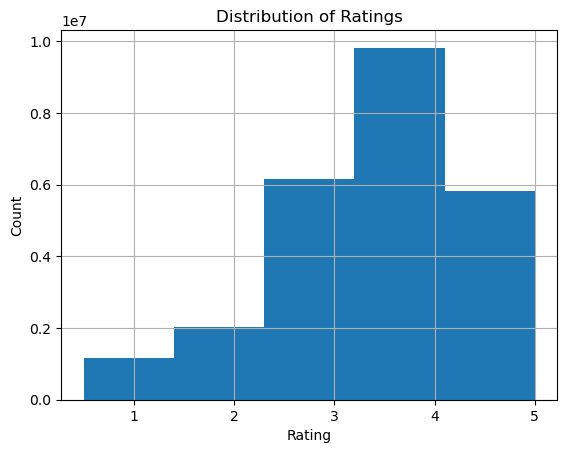

In [12]:
import matplotlib.pyplot as plt
ratings['rating'].hist(bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [32]:
#Convert timestamp in datetime
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"],unit='s')

# group by month and year
month_year = ratings.groupby(ratings.timestamp.dt.to_period("M"))["rating"].mean()


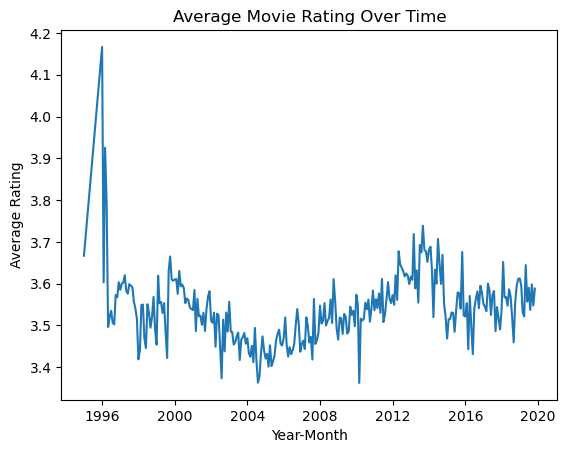

timestamp
1995-01    3.666667
1996-01    4.166667
1996-02    3.602649
1996-03    3.925154
1996-04    3.795461
             ...   
2019-07    3.589886
2019-08    3.537128
2019-09    3.598102
2019-10    3.547461
2019-11    3.587987
Freq: M, Name: rating, Length: 287, dtype: float64


In [33]:
# create line chart
plt.plot(month_year.index.to_timestamp(), month_year.values)
plt.xlabel('Year-Month')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over Time')
plt.show()
print(month_year)

In [14]:
#RATINGS DISTRIBUTION BY USERS
user_ratings = ratings.groupby('user_id')['rating'].mean()
user_ratings

user_id
1         3.814286
2         3.630435
3         3.697409
4         3.378099
5         3.752475
            ...   
162537    4.039604
162538    3.415584
162539    4.510638
162540    3.829545
162541    3.365385
Name: rating, Length: 162541, dtype: float64

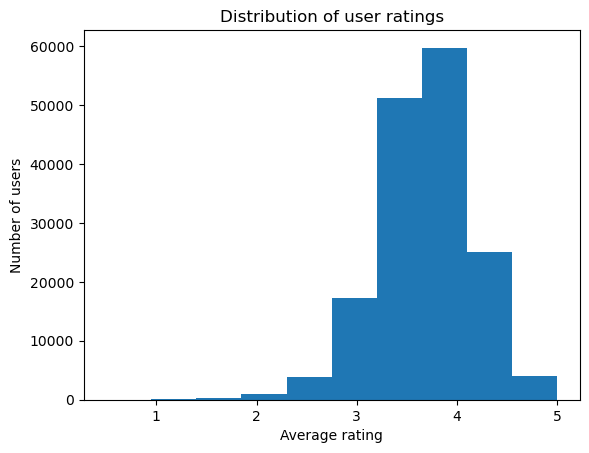

In [15]:
import matplotlib.pyplot as plt

user_ratings = ratings.groupby('user_id')['rating'].mean()
plt.hist(user_ratings)
plt.xlabel('Average rating')
plt.ylabel('Number of users')
plt.title('Distribution of user ratings')
plt.show()


In [16]:
data["genre"] = data["genre"].str.split("|")

# explode genres column
moviess = data.explode('genre')

# group by genres
genre_ratings = moviess.groupby(['genre'])['rating'].mean()

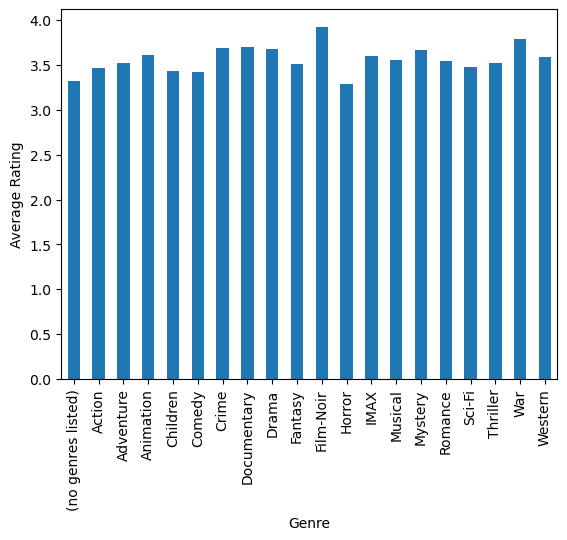

genre
(no genres listed)    3.326379
Action                3.466592
Adventure             3.517445
Animation             3.614946
Children              3.432507
Comedy                3.423993
Crime                 3.685044
Documentary           3.705281
Drama                 3.677185
Fantasy               3.511589
Film-Noir             3.925728
Horror                3.293563
IMAX                  3.603712
Musical               3.554716
Mystery               3.670169
Romance               3.542712
Sci-Fi                3.478143
Thriller              3.522964
War                   3.791466
Western               3.585755
Name: rating, dtype: float64

In [17]:
genre_ratings.plot(kind='bar', xlabel='Genre', ylabel='Average Rating')
plt.show()
genre_ratings

In [70]:
x=0